# **Loading the Dataset**

In [1]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path1 = 'SJTU-AN21_training-set.csv'

# Read the CSV file
data1 = pd.read_csv(file_path1)

In [2]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path2 = 'SJTU-AN21_test-set.csv'

# Read the CSV file
data2 = pd.read_csv(file_path2)



In [3]:
import pandas as pd

# Concatenating data1 and data2 along rows
df = pd.concat([data1, data2], ignore_index=True)



In [4]:
# Check unique values in the 'TrafficType' column
unique_traffic_types = df['TrafficType'].unique()

# Display the unique values
unique_traffic_types


array(['Eepsites', 'IRC', 'Snark', 'Video', 'JonDonym', 'Bittorrent',
       'Chat', 'FTP', 'Streaming', 'Browsing'], dtype=object)

# **Exploratory Data Analysis**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the shape of the dataset
print("\nShape of the dataset (rows, columns):")
df.shape


Shape of the dataset (rows, columns):


(36193, 85)

In [6]:
# Check for duplicate rows in the dataset
duplicates = df[df.duplicated()]


In [7]:
# Select only the numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

In [8]:
# Check the correlation matrix for numerical columns
print("\nCorrelation matrix:")
correlation_matrix = numerical_df.corr()




Correlation matrix:


C:\Users\jiasl\AppData\Local\Temp\ipykernel_35368\539165675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TrafficType', data=df, palette='Set3')


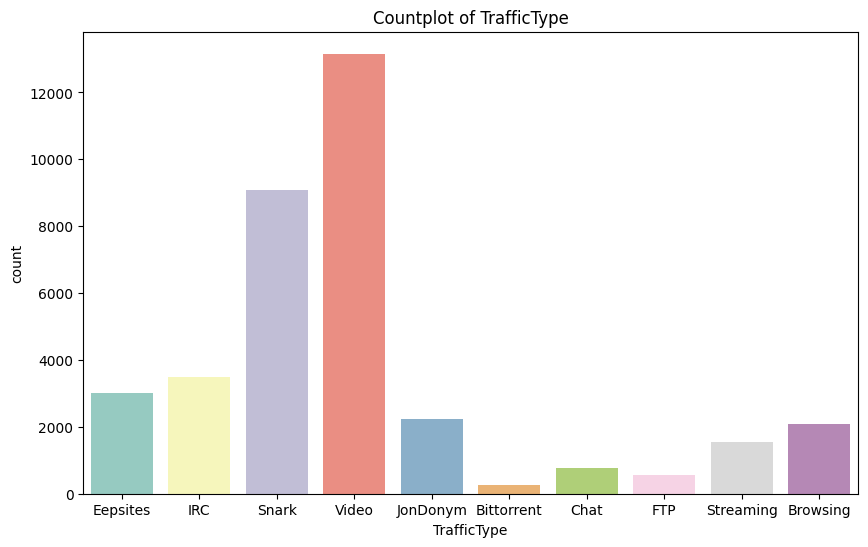

In [9]:
# Countplot for categorical columns (example with one column, replace 'TrafficType' with your column)
plt.figure(figsize=(10, 6))
sns.countplot(x='TrafficType', data=df, palette='Set3')
plt.title('Countplot of TrafficType')
plt.show()

# **Data Preprocessing**

In [10]:
# Remove duplicate rows
df_ = df.drop_duplicates()

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to remove outliers using IQR method
def remove_outliers_iqr(df_):
    # For each numerical column, calculate IQR and remove outliers
    for col in df_.select_dtypes(include=[np.number]).columns:
        Q1 = df_[col].quantile(0.25)
        Q3 = df_[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 0.25 * IQR
        upper_bound = Q3 + 0.70 * IQR

        # Filter the dataset to remove rows with outliers
        df_ = df_[(df_[col] >= lower_bound) & (df_[col] <= upper_bound)]

    return df_

# Cleaned dataset without outliers
df_ = remove_outliers_iqr(df_)

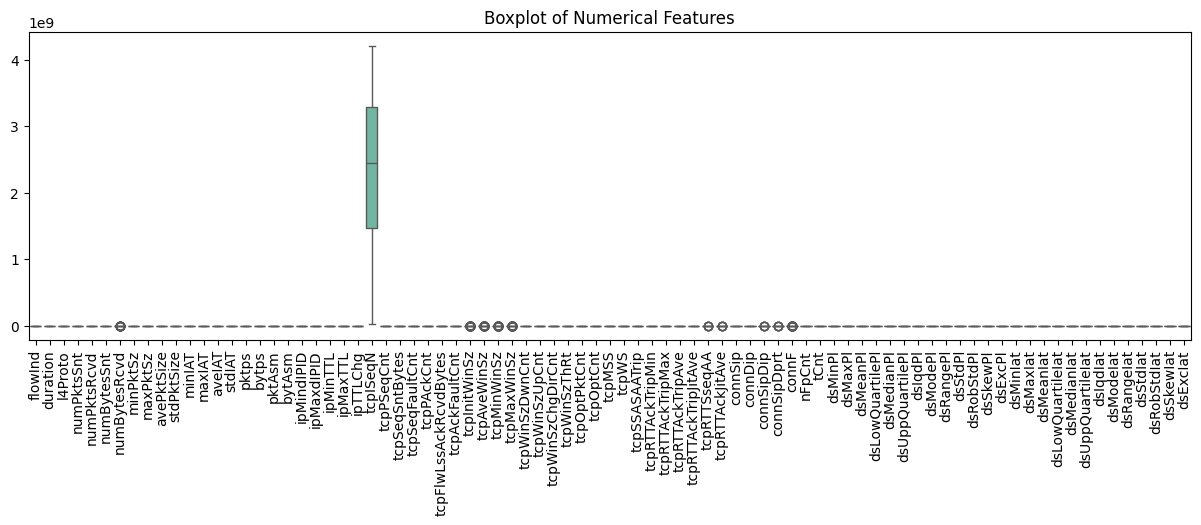

In [12]:
# Boxplot for detecting outliers in numerical columns
plt.figure(figsize=(15, 4))
sns.boxplot(data=df_, palette='Set2')
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

In [13]:
import pandas as pd

# Assuming df is your DataFrame
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['%dir', 'TrafficType'], dtype='object')


In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = ['%dir', 'TrafficType']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Example DataFrame
data = {'TrafficType': ['Eepsites', 'IRC', 'Snark', 'Video', 'JonDonym', 'Bittorrent', 'Chat', 'FTP', 'Streaming', 'Browsing']}
data = pd.DataFrame(data)

# Initialize and fit the LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(data['TrafficType'])

# Create a mapping of original values to encoded values
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Mapping of original values to encoded values for 'TrafficType':")
for original_value, encoded_value in mapping.items():
    print(f"{original_value}: {encoded_value}")

Mapping of original values to encoded values for 'TrafficType':
Bittorrent: 0
Browsing: 1
Chat: 2
Eepsites: 3
FTP: 4
IRC: 5
JonDonym: 6
Snark: 7
Streaming: 8
Video: 9


# **Data Balancing**

In [16]:
print(df['TrafficType'].value_counts())

TrafficType
9    13158
7     9068
5     3493
3     3022
6     2221
1     2088
8     1547
2      774
4      548
0      274
Name: count, dtype: int64


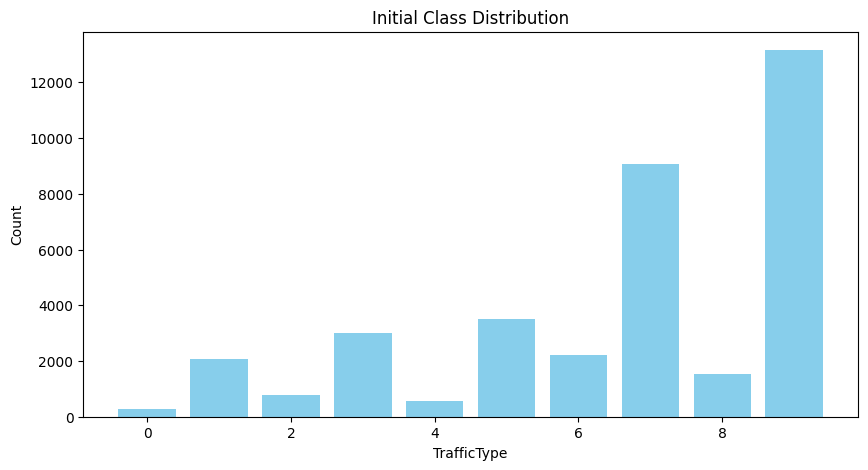

In [17]:
# Step 1: Plot the initial class distribution
def plot_class_distribution(counts, title):
    plt.figure(figsize=(10, 5))
    plt.bar(counts.index, counts.values, color='skyblue')
    plt.title(title)
    plt.xlabel('TrafficType')
    plt.ylabel('Count')
    plt.show()
# Assuming 'TrafficType' is your target column
plot_class_distribution(df['TrafficType'].value_counts(), 'Initial Class Distribution')


In [18]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import pandas as pd

# Assuming df is your dataset with 'TrafficType' as the target column
X = df.drop('TrafficType', axis=1)  # Features
y = df['TrafficType']  # Target

# 1. Downsampling
def downsample(X, y):
    rus = RandomUnderSampler(random_state=42)
    X_res, y_res = rus.fit_resample(X, y)
    print(f"Downsampled Class Distribution: {Counter(y_res)}")
    return X_res, y_res

# 2. Oversampling
def oversample(X, y):
    ros = RandomOverSampler(random_state=42)
    X_res, y_res = ros.fit_resample(X, y)
    print(f"Oversampled Class Distribution: {Counter(y_res)}")
    return X_res, y_res

# 3. Midpoint Sampling (combining upsampling and downsampling)
def calculate_midpoint(y):
    class_counts = Counter(y)
    min_class_size = min(class_counts.values())
    max_class_size = max(class_counts.values())
    midpoint_value = (min_class_size + max_class_size) // 2
    print(f"Midpoint Value for Resampling: {midpoint_value}")
    return midpoint_value

def midpoint_sample(X, y):
    class_counts = Counter(y)
    midpoint_value = calculate_midpoint(y)

    # Define strategies for upsampling and downsampling
    under_strategy = {cls: min(count, midpoint_value) for cls, count in class_counts.items() if count > midpoint_value}
    over_strategy = {cls: max(count, midpoint_value) for cls, count in class_counts.items() if count < midpoint_value}

    # Downsample majority classes to the midpoint value
    if under_strategy:
        rus = RandomUnderSampler(sampling_strategy=under_strategy, random_state=42)
        X, y = rus.fit_resample(X, y)

    # Upsample minority classes to the midpoint value
    if over_strategy:
        ros = RandomOverSampler(sampling_strategy=over_strategy, random_state=42)
        X, y = ros.fit_resample(X, y)

    print(f"Midpoint Sampled Class Distribution: {Counter(y)}")
    return X, y

# Apply the methods:
X_downsampled, y_downsampled = downsample(X, y)
X_oversampled, y_oversampled = oversample(X, y)
X_mid_sampled, y_mid_sampled = midpoint_sample(X, y)  # Replacing SMOTEENN with midpoint sampling

# Combine X and y back into DataFrames
df_downsampled = pd.concat([X_downsampled, y_downsampled], axis=1)
df_oversampled = pd.concat([X_oversampled, y_oversampled], axis=1)
df_mid_sampled = pd.concat([X_mid_sampled, y_mid_sampled], axis=1)

# Save datasets as CSV files
df_downsampled.to_csv('downsampled_dataset.csv', index=False)
df_oversampled.to_csv('oversampled_dataset.csv', index=False)
df_mid_sampled.to_csv('mid_sampled_dataset.csv', index=False)  # Updated filename for midpoint sampling

print("Datasets saved successfully!")


Downsampled Class Distribution: Counter({0: 274, 1: 274, 2: 274, 3: 274, 4: 274, 5: 274, 6: 274, 7: 274, 8: 274, 9: 274})
Oversampled Class Distribution: Counter({3: 13158, 5: 13158, 7: 13158, 9: 13158, 6: 13158, 0: 13158, 2: 13158, 4: 13158, 8: 13158, 1: 13158})
Midpoint Value for Resampling: 6716
Midpoint Sampled Class Distribution: Counter({0: 6716, 1: 6716, 2: 6716, 3: 6716, 4: 6716, 5: 6716, 6: 6716, 7: 6716, 8: 6716, 9: 6716})
Datasets saved successfully!


In [19]:
print(df_downsampled['TrafficType'].value_counts())

TrafficType
0    274
1    274
2    274
3    274
4    274
5    274
6    274
7    274
8    274
9    274
Name: count, dtype: int64


In [20]:
print(df_oversampled['TrafficType'].value_counts())

TrafficType
3    13158
5    13158
7    13158
9    13158
6    13158
0    13158
2    13158
4    13158
8    13158
1    13158
Name: count, dtype: int64


In [21]:
print(df_mid_sampled['TrafficType'].value_counts())

TrafficType
0    6716
1    6716
2    6716
3    6716
4    6716
5    6716
6    6716
7    6716
8    6716
9    6716
Name: count, dtype: int64


# **Selection Of Dataset**

In [22]:
df=df_oversampled

# **Feature Selection**

# **Applying Maximum Voting Algorithm**

C:\Users\jiasl\AppData\Local\Temp\ipykernel_35368\1170719689.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')


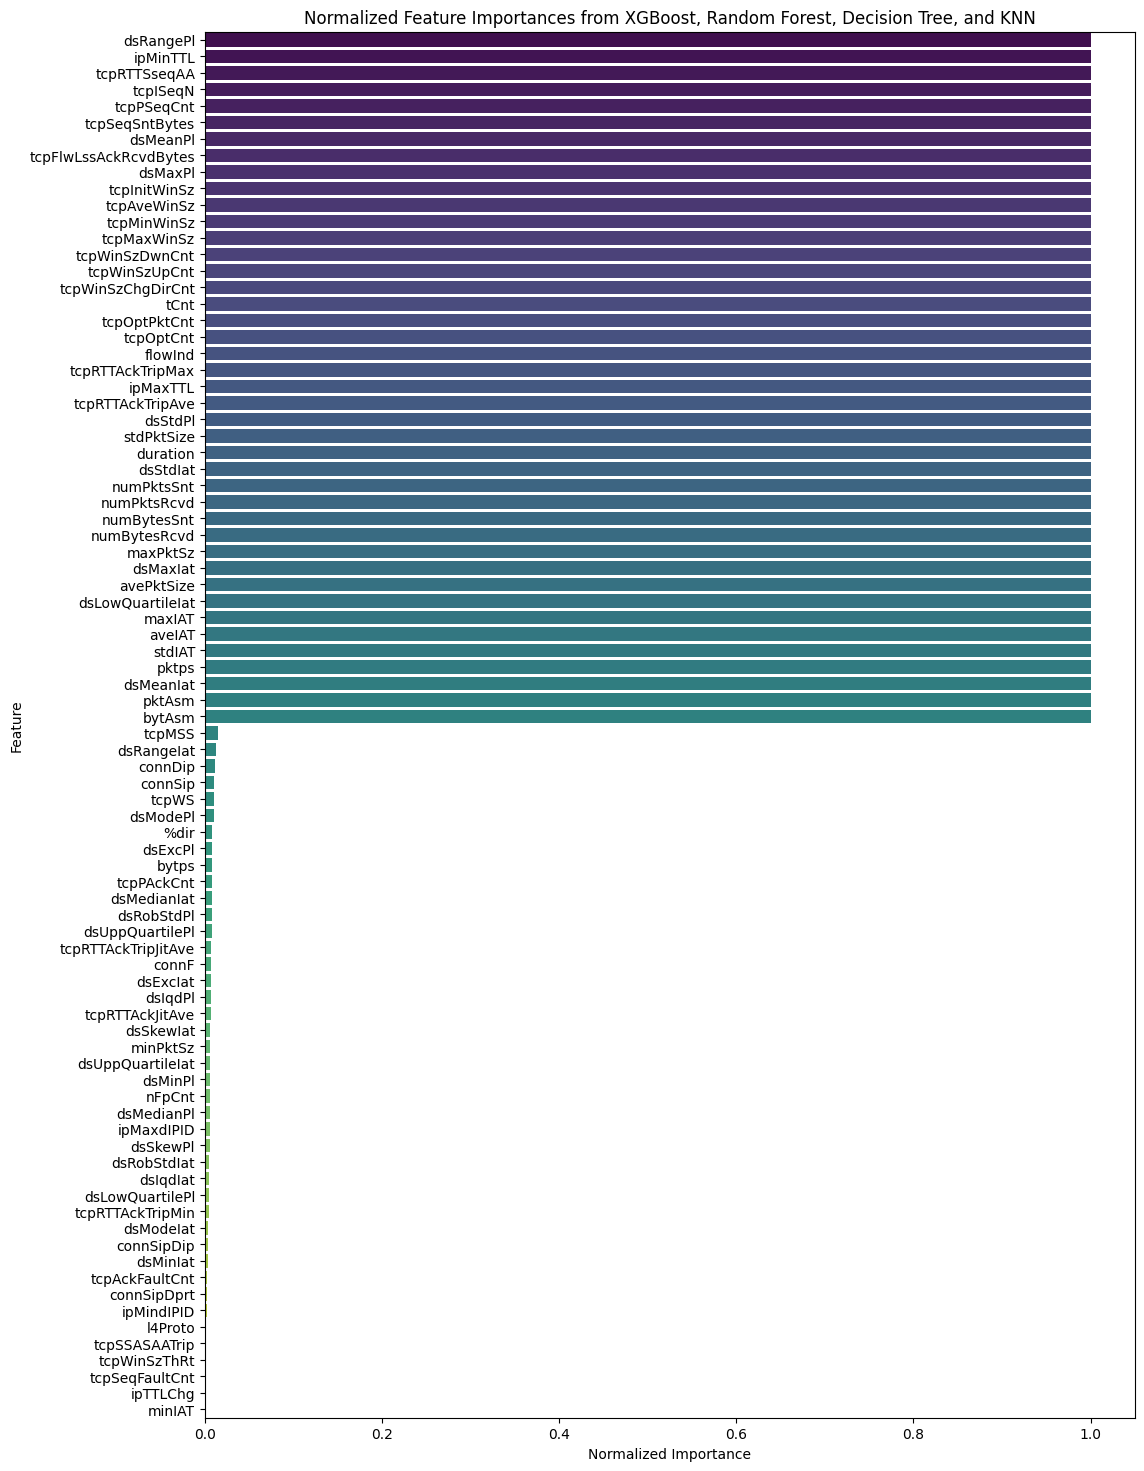

Selected features with importance > 0.60:
66                dsRangePl
22                 ipMinTTL
49             tcpRTTSseqAA
25                 tcpISeqN
26               tcpPSeqCnt
27           tcpSeqSntBytes
60                 dsMeanPl
30    tcpFlwLssAckRcvdBytes
59                  dsMaxPl
32             tcpInitWinSz
33              tcpAveWinSz
34              tcpMinWinSz
35              tcpMaxWinSz
36           tcpWinSzDwnCnt
37            tcpWinSzUpCnt
38        tcpWinSzChgDirCnt
57                     tCnt
40             tcpOptPktCnt
41                tcpOptCnt
1                   flowInd
46         tcpRTTAckTripMax
23                 ipMaxTTL
47         tcpRTTAckTripAve
67                  dsStdPl
11               stdPktSize
2                  duration
80                 dsStdIat
4                numPktsSnt
5               numPktsRcvd
6               numBytesSnt
7              numBytesRcvd
9                  maxPktSz
72                 dsMaxIat
10               avePktSize
74    

In [23]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your dataset with 'TrafficType' as the target column
X = df.drop('TrafficType', axis=1)
y = df['TrafficType']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
knn = KNeighborsClassifier()

# Fit the models
decision_tree.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)

selector = SelectFromModel(random_forest, threshold='median')
selector.fit(X_train_scaled, y_train)
knn_features = selector.get_support(indices=True)

# Function to get feature importance scores from models
def get_feature_importance(model, method='importances'):
    if method == 'importances':
        return model.feature_importances_
    elif method == 'knn':

        importance_knn = np.zeros(X_train.shape[1])
        importance_knn[knn_features] = 1
        return importance_knn
    else:
        raise ValueError("Invalid method specified")

# Extract feature importance from models
importance_dt = get_feature_importance(decision_tree, method='importances')
importance_rf = get_feature_importance(random_forest, method='importances')
importance_xgb = get_feature_importance(xgb, method='importances')
importance_knn = get_feature_importance(knn, method='knn')

# Aggregate feature importances using maximum voting (maximum across all models)
feature_importances = np.maximum.reduce([importance_dt, importance_rf, importance_xgb, importance_knn])

# Normalize feature importances to scale between 0 and 1
feature_importances_normalized = feature_importances / np.max(feature_importances)

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_normalized
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

selected_features = feature_importances_df[feature_importances_df['Importance'] > 0.60]['Feature']

# Plot the normalized feature importances
plt.figure(figsize=(12, 18))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')
plt.title('Normalized Feature Importances from XGBoost, Random Forest, Decision Tree, and KNN')
plt.xlabel('Normalized Importance')
plt.ylabel('Feature')
plt.show()

# Display the selected features
print("Selected features with importance > 0.60:")
print(selected_features)

In [24]:
selected_features.count()

42

In [25]:
# Use the selected features for your dataset
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [26]:
df = df[selected_features]
df['TrafficType'] = y

C:\Users\jiasl\AppData\Local\Temp\ipykernel_35368\2238143331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TrafficType'] = y


# **Applying Machine Learning Algorithms**

**1- Applying Random Forest Model**

In [27]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, log_loss, classification_report, precision_score, recall_score, f1_score

# Features and target
X = df.drop(columns=['TrafficType'])
y = df['TrafficType']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# List to hold results for different fold counts
results = []

# Define a range of fold counts to test (up to 10)
folds_range = range(2, 11)  # Run up to 10 folds

# Loop over different fold counts
for n_folds in folds_range:
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Initialize RandomForestClassifier
    rf_clf = RandomForestClassifier(random_state=42)

    # Store accuracy, kappa, log loss, precision, recall, and F1-score for each fold
    rf_scores = []
    kappa_scores = []
    log_loss_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    print(f"\nEvaluating with {n_folds} folds:\n" + "=" * 40)

    # Define class names
    class_names = ['Bittorrent', 'Browsing', 'Chat', 'Eepsites', 'FTP', 'IRC', 'JonDonym', 'Snark', 'Streaming', 'Video']

    # Perform cross-validation manually
    for fold_index, (train_index, test_index) in enumerate(kf.split(X_scaled), start=1):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Use .iloc[] to access by position

        # Train RandomForest model
        rf_clf.fit(X_train, y_train)

        # Predict on the test set
        y_pred = rf_clf.predict(X_test)
        y_pred_proba = rf_clf.predict_proba(X_test)  # For log loss calculation

        # Calculate accuracy
        acc = accuracy_score(y_test, y_pred)
        rf_scores.append(acc)

        # Calculate Cohen's Kappa
        kappa = cohen_kappa_score(y_test, y_pred)
        kappa_scores.append(kappa)

        # Calculate Logarithmic Loss
        loss = log_loss(y_test, y_pred_proba)
        log_loss_scores.append(loss)

        # Calculate precision, recall, and F1-score (weighted)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        # Print the evaluation report for fold 10 only
        if fold_index == 10:
            print(f"\nFold 10 Results:")
            print(f"Accuracy: {acc:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(classification_report(y_test, y_pred, target_names=class_names))

    # Store the results for the current number of folds
    results.append({
        'n_folds': n_folds,
        'mean_accuracy': np.mean(rf_scores),
        'std_accuracy': np.std(rf_scores),
        'mean_kappa': np.mean(kappa_scores),
        'mean_log_loss': np.mean(log_loss_scores),
        'mean_precision': np.mean(precision_scores),
        'mean_recall': np.mean(recall_scores),
        'mean_f1_score': np.mean(f1_scores)
    })

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display the results for each fold count
print("\nSummary of Results Across Fold Counts:")
print(results_df)

# Print overall average metrics for the best fold count based on mean accuracy
best_result = results_df.loc[results_df['mean_accuracy'].idxmax()]

print("\nBest Performing Model Configuration Based on Mean Accuracy:")
print(f"Number of Folds: {best_result['n_folds']}")
print(f"Mean Accuracy: {best_result['mean_accuracy']}")
print(f"Standard Deviation of Accuracy: {best_result['std_accuracy']}")
print(f"Mean Kappa: {best_result['mean_kappa']}")
print(f"Mean Log Loss: {best_result['mean_log_loss']}")
print(f"Mean Precision: {best_result['mean_precision']}")
print(f"Mean Recall: {best_result['mean_recall']}")
print(f"Mean F1 Score: {best_result['mean_f1_score']}")



Evaluating with 2 folds:

Evaluating with 3 folds:

Evaluating with 4 folds:

Evaluating with 5 folds:

Evaluating with 6 folds:


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(



Evaluating with 7 folds:

Evaluating with 8 folds:

Evaluating with 9 folds:


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(



Evaluating with 10 folds:

Fold 10 Results:
Accuracy: 0.9758
Precision: 0.9759
Recall: 0.9758
F1 Score: 0.9756
              precision    recall  f1-score   support

  Bittorrent       1.00      1.00      1.00      1283
    Browsing       1.00      1.00      1.00      1282
        Chat       1.00      1.00      1.00      1255
    Eepsites       0.97      1.00      0.99      1325
         FTP       1.00      1.00      1.00      1366
         IRC       0.92      0.99      0.95      1296
    JonDonym       1.00      1.00      1.00      1335
       Snark       0.94      0.89      0.92      1337
   Streaming       1.00      1.00      1.00      1338
       Video       0.92      0.88      0.90      1341

    accuracy                           0.98     13158
   macro avg       0.98      0.98      0.98     13158
weighted avg       0.98      0.98      0.98     13158


Summary of Results Across Fold Counts:
   n_folds  mean_accuracy  std_accuracy  mean_kappa  mean_log_loss  \
0        2       0.

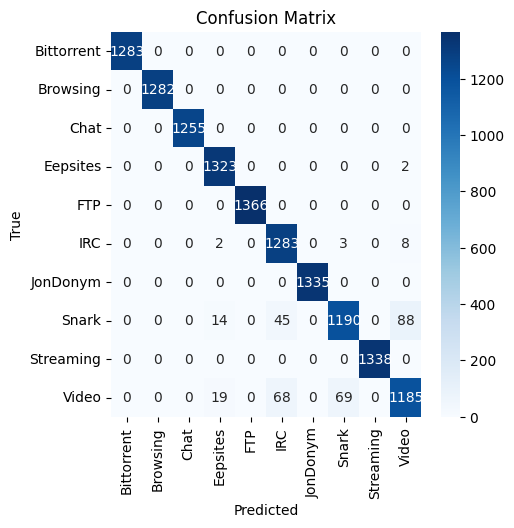

In [28]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Class names (adjust based on your data)
class_names = ['Bittorrent', 'Browsing', 'Chat', 'Eepsites', 'FTP', 'IRC', 'JonDonym', 'Snark', 'Streaming', 'Video']

# Confusion Matrix function
def plot_confusion_matrix(y_test, y_pred, class_names):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Usage example:
# Assuming y_test and y_pred are available from model predictions
plot_confusion_matrix(y_test, y_pred, class_names)


**2- Applying KNN Model**

In [29]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, log_loss, classification_report, precision_score, recall_score, f1_score

# Assuming df is already defined
# Features and target
X = df.drop(columns=['TrafficType'])
y = df['TrafficType']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# List to hold results for different fold counts
results = []

# Define a range of fold counts to test (up to 10)
folds_range = range(2, 11)  # Run up to 10 folds

# Loop over different fold counts
for n_folds in folds_range:
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Initialize KNeighborsClassifier (default 5 neighbors)
    knn_clf = KNeighborsClassifier()

    # Store accuracy, kappa, log loss, precision, recall, and F1-score for each fold
    knn_scores = []
    kappa_scores = []
    log_loss_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    print(f"\nEvaluating with {n_folds} folds:\n" + "=" * 40)

    # Define class names (modify according to your dataset)
    class_names = ['Bittorrent', 'Browsing', 'Chat', 'Eepsites', 'FTP', 'IRC', 'JonDonym', 'Snark', 'Streaming', 'Video']

    for fold_index, (train_index, test_index) in enumerate(kf.split(X_scaled), start=1):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Use .iloc[] for positional indexing

        # Train KNN model
        knn_clf.fit(X_train, y_train)

        # Predict on the test set
        y_pred = knn_clf.predict(X_test)
        y_pred_proba = knn_clf.predict_proba(X_test)  # For log loss calculation

        # Calculate accuracy
        acc = accuracy_score(y_test, y_pred)
        knn_scores.append(acc)

        # Calculate Cohen's Kappa
        kappa = cohen_kappa_score(y_test, y_pred)
        kappa_scores.append(kappa)

        # Calculate Logarithmic Loss
        loss = log_loss(y_test, y_pred_proba)
        log_loss_scores.append(loss)

        # Calculate precision, recall, and F1-score (weighted)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        # Print the evaluation report for fold 10 only
        if fold_index == 10:
            print(f"\nFold 10 Results:")
            print(f"Accuracy: {acc:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(classification_report(y_test, y_pred, target_names=class_names))

    # Store the results for the current number of folds
    results.append({
        'n_folds': n_folds,
        'mean_accuracy': np.mean(knn_scores),
        'std_accuracy': np.std(knn_scores),
        'mean_kappa': np.mean(kappa_scores),
        'mean_log_loss': np.mean(log_loss_scores),
        'mean_precision': np.mean(precision_scores),
        'mean_recall': np.mean(recall_scores),
        'mean_f1_score': np.mean(f1_scores)
    })

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display the results for each fold count
print("\nSummary of Results Across Fold Counts:")
print(results_df)

# Print overall average metrics for the best fold count based on mean accuracy
best_result = results_df.loc[results_df['mean_accuracy'].idxmax()]

print("\nBest Performing Model Configuration Based on Mean Accuracy:")
print(f"Number of Folds: {best_result['n_folds']}")
print(f"Mean Accuracy: {best_result['mean_accuracy']}")
print(f"Standard Deviation of Accuracy: {best_result['std_accuracy']}")
print(f"Mean Kappa: {best_result['mean_kappa']}")
print(f"Mean Log Loss: {best_result['mean_log_loss']}")
print(f"Mean Precision: {best_result['mean_precision']}")
print(f"Mean Recall: {best_result['mean_recall']}")
print(f"Mean F1 Score: {best_result['mean_f1_score']}")




Evaluating with 2 folds:

Evaluating with 3 folds:

Evaluating with 4 folds:

Evaluating with 5 folds:

Evaluating with 6 folds:

Evaluating with 7 folds:

Evaluating with 8 folds:

Evaluating with 9 folds:

Evaluating with 10 folds:

Fold 10 Results:
Accuracy: 0.9151
Precision: 0.9168
Recall: 0.9151
F1 Score: 0.9131
              precision    recall  f1-score   support

  Bittorrent       1.00      1.00      1.00      1283
    Browsing       0.99      0.99      0.99      1282
        Chat       0.98      1.00      0.99      1255
    Eepsites       0.84      0.95      0.89      1325
         FTP       1.00      1.00      1.00      1366
         IRC       0.72      0.88      0.79      1296
    JonDonym       0.99      0.99      0.99      1335
       Snark       0.86      0.71      0.77      1337
   Streaming       0.98      1.00      0.99      1338
       Video       0.81      0.65      0.72      1341

    accuracy                           0.92     13158
   macro avg       0.92      0

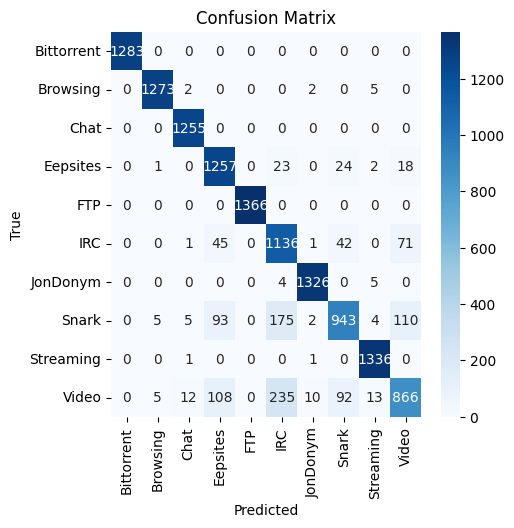

In [30]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Class names (adjust based on your data)
class_names = ['Bittorrent', 'Browsing', 'Chat', 'Eepsites', 'FTP', 'IRC', 'JonDonym', 'Snark', 'Streaming', 'Video']

# Confusion Matrix function
def plot_confusion_matrix(y_test, y_pred, class_names):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Usage example:
# Assuming y_test and y_pred are available from KNN model predictions
plot_confusion_matrix(y_test, y_pred, class_names)


**3- Applying Hybrid Random Forest and KNN Model**

In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, cohen_kappa_score, log_loss, classification_report, precision_score, recall_score, f1_score

# Assuming df is already defined
# Features and target
X = df.drop(columns=['TrafficType'])
y = df['TrafficType']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# List to hold results for different fold counts
results = []

# Define a range of fold counts to test (up to 10)
folds_range = range(2, 11)  # Run up to 10 folds

# Loop over different fold counts
for n_folds in folds_range:
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Initialize RandomForest and KNeighbors classifiers
    rf_clf = RandomForestClassifier(random_state=42)
    knn_clf = KNeighborsClassifier()

    # Stacking Classifier (meta-classifier will be LogisticRegression)
    estimators = [('rf', rf_clf), ('knn', knn_clf)]
    hybrid_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

    # Store accuracy, kappa, log loss, precision, recall, and F1-score for each fold
    hybrid_scores = []
    kappa_scores = []
    log_loss_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    print(f"\nEvaluating with {n_folds} folds:\n" + "=" * 40)

    # Define class names
    class_names = ['Bittorrent', 'Browsing', 'Chat', 'Eepsites', 'FTP', 'IRC', 'JonDonym', 'Snark', 'Streaming', 'Video']

    for fold_index, (train_index, test_index) in enumerate(kf.split(X_scaled), start=1):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train hybrid model
        hybrid_model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = hybrid_model.predict(X_test)
        y_pred_proba = hybrid_model.predict_proba(X_test)

        # Calculate accuracy
        acc = accuracy_score(y_test, y_pred)
        hybrid_scores.append(acc)

        # Calculate Cohen's Kappa
        kappa = cohen_kappa_score(y_test, y_pred)
        kappa_scores.append(kappa)

        # Calculate Logarithmic Loss
        loss = log_loss(y_test, y_pred_proba)
        log_loss_scores.append(loss)

        # Calculate precision, recall, and F1-score (weighted)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        # Print the evaluation report for fold 10 only
        if fold_index == 10:
            print(f"\nFold 10 Results:")
            print(f"Accuracy: {acc:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(classification_report(y_test, y_pred, target_names=class_names))

    # Store the results for the current number of folds
    results.append({
        'n_folds': n_folds,
        'mean_accuracy': np.mean(hybrid_scores),
        'std_accuracy': np.std(hybrid_scores),
        'mean_kappa': np.mean(kappa_scores),
        'mean_log_loss': np.mean(log_loss_scores),
        'mean_precision': np.mean(precision_scores),
        'mean_recall': np.mean(recall_scores),
        'mean_f1_score': np.mean(f1_scores)
    })

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display the results for each fold count
print("\nSummary of Results Across Fold Counts:")
print(results_df)

# Print overall average metrics for the best fold count based on mean accuracy
best_result = results_df.loc[results_df['mean_accuracy'].idxmax()]

print("\nBest Performing Model Configuration Based on Mean Accuracy:")
print(f"Number of Folds: {best_result['n_folds']}")
print(f"Mean Accuracy: {best_result['mean_accuracy']}")
print(f"Standard Deviation of Accuracy: {best_result['std_accuracy']}")
print(f"Mean Kappa: {best_result['mean_kappa']}")
print(f"Mean Log Loss: {best_result['mean_log_loss']}")
print(f"Mean Precision: {best_result['mean_precision']}")
print(f"Mean Recall: {best_result['mean_recall']}")
print(f"Mean F1 Score: {best_result['mean_f1_score']}")




Evaluating with 2 folds:

Evaluating with 3 folds:

Evaluating with 4 folds:

Evaluating with 5 folds:

Evaluating with 6 folds:

Evaluating with 7 folds:

Evaluating with 8 folds:

Evaluating with 9 folds:

Evaluating with 10 folds:

Fold 10 Results:
Accuracy: 0.9805
Precision: 0.9805
Recall: 0.9805
F1 Score: 0.9805
              precision    recall  f1-score   support

  Bittorrent       1.00      1.00      1.00      1283
    Browsing       1.00      1.00      1.00      1282
        Chat       1.00      1.00      1.00      1255
    Eepsites       0.99      1.00      0.99      1325
         FTP       1.00      1.00      1.00      1366
         IRC       0.97      0.99      0.98      1296
    JonDonym       1.00      1.00      1.00      1335
       Snark       0.94      0.90      0.92      1337
   Streaming       1.00      1.00      1.00      1338
       Video       0.91      0.92      0.92      1341

    accuracy                           0.98     13158
   macro avg       0.98      0

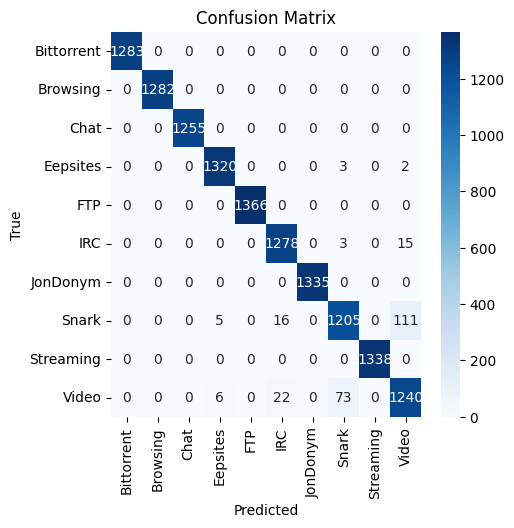

In [32]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Class names (adjust based on your data)
class_names = ['Bittorrent', 'Browsing', 'Chat', 'Eepsites', 'FTP', 'IRC', 'JonDonym', 'Snark', 'Streaming', 'Video']

# Confusion Matrix function
def plot_confusion_matrix(y_test, y_pred, class_names):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Usage example:
# Assuming y_test and y_pred are available from hybrid model predictions
plot_confusion_matrix(y_test, y_pred, class_names)


# **Applying Deep Learning Models**

**1- Applying LSTM Model**

In [33]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, log_loss, classification_report, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Assuming df is already defined with features and labels
# Features and target
X = df.drop(columns=['TrafficType'])
y = df['TrafficType']

# Convert target to categorical (one-hot encoding)
y = to_categorical(y)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshaping X to fit the LSTM input [samples, timesteps, features]
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# List to hold results for different fold counts
results = []

# Define a range of fold counts to test (up to 5 for training time considerations)
folds_range = range(2, 6)  # Run up to 5 folds

# Loop over different fold counts
for n_folds in folds_range:
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Store accuracy, kappa, log loss, precision, recall, and F1-score for each fold
    lstm_scores = []
    kappa_scores = []
    log_loss_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    print(f"\nEvaluating with {n_folds} folds:\n" + "=" * 40)

    # Define class names
    class_names = ['Bittorrent', 'Browsing', 'Chat', 'Eepsites', 'FTP', 'IRC', 'JonDonym', 'Snark', 'Streaming', 'Video']

    for fold_index, (train_index, test_index) in enumerate(kf.split(X_scaled), start=1):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Build the LSTM model
        model = Sequential([
            LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
            Dropout(0.2),
            Dense(64, activation='relu'),
            Dropout(0.2),
            Dense(y_train.shape[1], activation='softmax')
        ])

        # Compile the model
        model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

        # Train the LSTM model
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

        # Predict on the test set
        y_pred_proba = model.predict(X_test)
        y_pred = np.argmax(y_pred_proba, axis=1)
        y_test_class = np.argmax(y_test, axis=1)

        # Calculate accuracy
        acc = accuracy_score(y_test_class, y_pred)
        lstm_scores.append(acc)

        # Calculate Cohen's Kappa
        kappa = cohen_kappa_score(y_test_class, y_pred)
        kappa_scores.append(kappa)

        # Calculate Logarithmic Loss
        loss = log_loss(y_test, y_pred_proba)
        log_loss_scores.append(loss)

        # Calculate precision, recall, and F1-score (weighted)
        precision = precision_score(y_test_class, y_pred, average='weighted')
        recall = recall_score(y_test_class, y_pred, average='weighted')
        f1 = f1_score(y_test_class, y_pred, average='weighted')

        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        # Print the evaluation report for fold 5 only
        if fold_index == 5:
            print(f"\nFold 5 Results:")
            print(f"Accuracy: {acc:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(classification_report(y_test_class, y_pred, target_names=class_names))

    # Store the results for the current number of folds
    results.append({
        'n_folds': n_folds,
        'mean_accuracy': np.mean(lstm_scores),
        'std_accuracy': np.std(lstm_scores),
        'mean_kappa': np.mean(kappa_scores),
        'mean_log_loss': np.mean(log_loss_scores),
        'mean_precision': np.mean(precision_scores),
        'mean_recall': np.mean(recall_scores),
        'mean_f1_score': np.mean(f1_scores)
    })

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display the results for each fold count
print("\nSummary of Results Across Fold Counts:")
print(results_df)

# Print overall average metrics for the best fold count based on mean accuracy
best_result = results_df.loc[results_df['mean_accuracy'].idxmax()]

print("\nBest Performing Model Configuration Based on Mean Accuracy:")
print(f"Number of Folds: {best_result['n_folds']}")
print(f"Mean Accuracy: {best_result['mean_accuracy']}")
print(f"Standard Deviation of Accuracy: {best_result['std_accuracy']}")
print(f"Mean Kappa: {best_result['mean_kappa']}")
print(f"Mean Log Loss: {best_result['mean_log_loss']}")
print(f"Mean Precision: {best_result['mean_precision']}")
print(f"Mean Recall: {best_result['mean_recall']}")
print(f"Mean F1 Score: {best_result['mean_f1_score']}")



Evaluating with 2 folds:
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2056/2056 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5550 - loss: 1.2350
Epoch 2/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7327 - loss: 0.6922
Epoch 3/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7729 - loss: 0.5894
Epoch 4/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7890 - loss: 0.5354
Epoch 5/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7978 - loss: 0.5043
Epoch 6/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8044 - loss: 0.4778
Epoch 7/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8122 - loss: 0.4653
Epoch 8/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8165 - loss: 0.4521
Epoch 9/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8193 - loss: 0.4424
Epoch 10/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8216 - loss: 0.4351
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2056/2056 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5647 - loss: 1.2084
Epoch 2/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7370 - loss: 0.6787
Epoch 3/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7662 - loss: 0.5906
Epoch 4/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7889 - loss: 0.5316
Epoch 5/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7976 - loss: 0.5048
Epoch 6/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8044 - loss: 0.4849
Epoch 7/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8062 - loss: 0.4788
Epoch 8/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8155 - loss: 0.4584
Epoch 9/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8175 - loss: 0.4552
Epoch 10/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8200 - loss: 0.4404
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

Evaluating with 3 folds:
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2742/2742 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5909 - loss: 1.1301
Epoch 2/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7528 - loss: 0.6423
Epoch 3/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7807 - loss: 0.5524
Epoch 4/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7930 - loss: 0.5114
Epoch 5/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8044 - loss: 0.4803
Epoch 6/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8088 - loss: 0.4670
Epoch 7/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8177 - loss: 0.4427
Epoch 8/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8212 - loss: 0.4362
Epoch 9/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8218 - loss: 0.4303
Epoch 10/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8278 - loss: 0.4169
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2742/2742 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5899 - loss: 1.1363
Epoch 2/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7532 - loss: 0.6396
Epoch 3/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7779 - loss: 0.5566
Epoch 4/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7943 - loss: 0.5138
Epoch 5/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8037 - loss: 0.4842
Epoch 6/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8118 - loss: 0.4634
Epoch 7/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8185 - loss: 0.4436
Epoch 8/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8187 - loss: 0.4392
Epoch 9/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8255 - loss: 0.4256
Epoch 10/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8245 - loss: 0.4205
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2742/2742 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5926 - loss: 1.1332
Epoch 2/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7500 - loss: 0.6504
Epoch 3/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7797 - loss: 0.5645
Epoch 4/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7966 - loss: 0.5143
Epoch 5/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8072 - loss: 0.4821
Epoch 6/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8121 - loss: 0.4634
Epoch 7/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8165 - loss: 0.4515
Epoch 8/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8222 - loss: 0.4365
Epoch 9/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8247 - loss: 0.4275
Epoch 10/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8270 - loss: 0.4219
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Evaluating with 4 folds:
Epoch 1/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6046 - loss: 1.1008
Epoch 2/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7588 - loss: 0.6208
Epoch 3/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7831 - loss: 0.5457
Epoch 4/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7996 - loss: 0.4995
Epoch 5/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8083 - loss: 0.4703
Epoch 6/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8193 - loss: 0.4494
Epoch 7/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8178 - loss: 0.4447
Epoch 8/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8253 - loss: 0.4260
Epoch 9/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8285 - loss: 0.4181
Epoch 10/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8292 - loss: 0.4134
1028/1028 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3084/3084 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5994 - loss: 1.1075
Epoch 2/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7560 - loss: 0.6235
Epoch 3/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7826 - loss: 0.5454
Epoch 4/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7965 - loss: 0.5103
Epoch 5/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8084 - loss: 0.4768
Epoch 6/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8116 - loss: 0.4634
Epoch 7/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8191 - loss: 0.4486
Epoch 8/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8237 - loss: 0.4311
Epoch 9/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8233 - loss: 0.4247
Epoch 10/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8285 - loss: 0.4143
1028/1028 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3084/3084 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5919 - loss: 1.1076
Epoch 2/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7535 - loss: 0.6264
Epoch 3/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7837 - loss: 0.5432
Epoch 4/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7996 - loss: 0.4956
Epoch 5/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8067 - loss: 0.4758
Epoch 6/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8156 - loss: 0.4531
Epoch 7/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8189 - loss: 0.4412
Epoch 8/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8222 - loss: 0.4294
Epoch 9/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8286 - loss: 0.4159
Epoch 10/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8308 - loss: 0.4112
1028/1028 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3084/3084 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5979 - loss: 1.1002
Epoch 2/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7586 - loss: 0.6210
Epoch 3/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7889 - loss: 0.5360
Epoch 4/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8041 - loss: 0.4891
Epoch 5/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8109 - loss: 0.4642
Epoch 6/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8194 - loss: 0.4432
Epoch 7/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8217 - loss: 0.4341
Epoch 8/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8267 - loss: 0.4232
Epoch 9/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8279 - loss: 0.4170
Epoch 10/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8313 - loss: 0.4099
1028/1028 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Evaluating with 5 folds:
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3290/3290 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5965 - loss: 1.1021
Epoch 2/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7625 - loss: 0.6124
Epoch 3/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7910 - loss: 0.5288
Epoch 4/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8036 - loss: 0.4898
Epoch 5/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8097 - loss: 0.4692
Epoch 6/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8152 - loss: 0.4538
Epoch 7/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8214 - loss: 0.4383
Epoch 8/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8260 - loss: 0.4248
Epoch 9/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8285 - loss: 0.4154
Epoch 10/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8286 - loss: 0.4134
823/823 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3290/3290 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5997 - loss: 1.0929
Epoch 2/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7583 - loss: 0.6207
Epoch 3/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7816 - loss: 0.5478
Epoch 4/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8002 - loss: 0.4977
Epoch 5/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8056 - loss: 0.4760
Epoch 6/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8124 - loss: 0.4558
Epoch 7/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8187 - loss: 0.4425
Epoch 8/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8229 - loss: 0.4307
Epoch 9/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8256 - loss: 0.4214
Epoch 10/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8287 - loss: 0.4133
823/823 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3290/3290 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6081 - loss: 1.0819
Epoch 2/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7651 - loss: 0.6050
Epoch 3/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7869 - loss: 0.5321
Epoch 4/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8027 - loss: 0.4918
Epoch 5/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8098 - loss: 0.4674
Epoch 6/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8153 - loss: 0.4489
Epoch 7/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8205 - loss: 0.4381
Epoch 8/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8227 - loss: 0.4291
Epoch 9/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8254 - loss: 0.4232
Epoch 10/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8302 - loss: 0.4122
823/823 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3290/3290 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6045 - loss: 1.0984
Epoch 2/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7629 - loss: 0.6109
Epoch 3/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7905 - loss: 0.5309
Epoch 4/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7995 - loss: 0.4953
Epoch 5/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8116 - loss: 0.4675
Epoch 6/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8192 - loss: 0.4408
Epoch 7/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8195 - loss: 0.4361
Epoch 8/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8261 - loss: 0.4228
Epoch 9/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8264 - loss: 0.4188
Epoch 10/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8295 - loss: 0.4087
823/823 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3290/3290 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5994 - loss: 1.0918
Epoch 2/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7588 - loss: 0.6172
Epoch 3/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7882 - loss: 0.5336
Epoch 4/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8002 - loss: 0.4976
Epoch 5/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8096 - loss: 0.4703
Epoch 6/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8139 - loss: 0.4562
Epoch 7/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8187 - loss: 0.4407
Epoch 8/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8229 - loss: 0.4301
Epoch 9/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8298 - loss: 0.4139
Epoch 10/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8314 - loss: 0.4102
823/823 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

Fold 5 Results:
Accuracy: 0.8475
Precision: 0.8627
Recall: 0.8475
F1 Score: 0.8483
     

C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


823/823 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
823/823 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
823/823 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
823/823 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
823/823 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


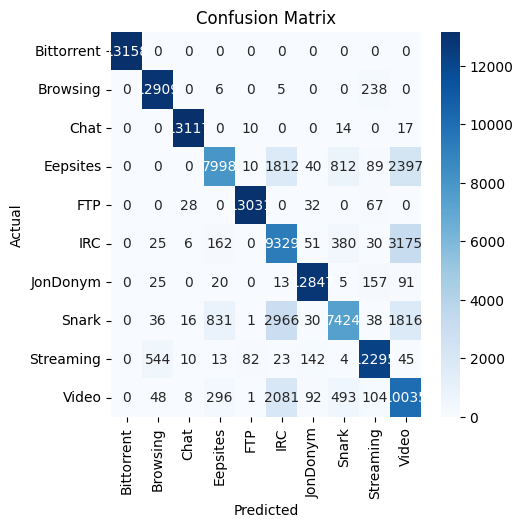

In [34]:
# After your imports and before plotting the confusion matrix

# Initialize lists to store true and predicted labels
y_true_all = []
y_pred_all = []

# Inside your KFold loop, after predicting
for fold_index, (train_index, test_index) in enumerate(kf.split(X_scaled)):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # (Your model building and training code here)

    # Predict on the test set
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_test_class = np.argmax(y_test, axis=1)

    # Append predictions and true labels for confusion matrix
    y_true_all.extend(y_test_class)  # Collecting true labels
    y_pred_all.extend(y_pred)         # Collecting predicted labels

# After the KFold loop

# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define class names (update this according to your dataset)
class_names = ['Bittorrent', 'Browsing', 'Chat', 'Eepsites', 'FTP', 'IRC', 'JonDonym', 'Snark', 'Streaming', 'Video']

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_all, y_pred_all)

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


**2- Applying ANN Model**

In [35]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, cohen_kappa_score, log_loss, classification_report, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Assuming df is already defined with features and labels
# Features and target
X = df.drop(columns=['TrafficType'])
y = df['TrafficType']

# Convert target to categorical (one-hot encoding)
y = to_categorical(y)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshaping X to fit the LSTM input [samples, timesteps, features]
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# List to hold results for different fold counts
results = []

# Define a range of fold counts to test (up to 5 for training time considerations)
folds_range = range(2, 6)  # Run up to 5 folds

# Loop over different fold counts
for n_folds in folds_range:
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Store accuracy, kappa, log loss, precision, recall, and F1-score for each fold
    lstm_scores = []
    kappa_scores = []
    log_loss_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    print(f"\nEvaluating with {n_folds} folds:\n" + "=" * 40)

    # Define class names
    class_names = ['Bittorrent', 'Browsing', 'Chat', 'Eepsites', 'FTP', 'IRC', 'JonDonym', 'Snark', 'Streaming', 'Video']

    for fold_index, (train_index, test_index) in enumerate(kf.split(X_scaled), start=1):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Build the LSTM model
        model = Sequential([
            LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
            Dropout(0.2),
            Dense(64, activation='relu'),
            Dropout(0.2),
            Dense(y_train.shape[1], activation='softmax')
        ])

        # Compile the model
        model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

        # Train the LSTM model
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

        # Predict on the test set
        y_pred_proba = model.predict(X_test)
        y_pred = np.argmax(y_pred_proba, axis=1)
        y_test_class = np.argmax(y_test, axis=1)

        # Calculate accuracy
        acc = accuracy_score(y_test_class, y_pred)
        lstm_scores.append(acc)

        # Calculate Cohen's Kappa
        kappa = cohen_kappa_score(y_test_class, y_pred)
        kappa_scores.append(kappa)

        # Calculate Logarithmic Loss
        loss = log_loss(y_test, y_pred_proba)
        log_loss_scores.append(loss)

        # Calculate precision, recall, and F1-score (weighted)
        precision = precision_score(y_test_class, y_pred, average='weighted')
        recall = recall_score(y_test_class, y_pred, average='weighted')
        f1 = f1_score(y_test_class, y_pred, average='weighted')

        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        # Print the evaluation report for fold 5 only
        if fold_index == 5:
            print(f"\nFold 5 Results:")
            print(f"Accuracy: {acc:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(classification_report(y_test_class, y_pred, target_names=class_names))

    # Store the results for the current number of folds
    results.append({
        'n_folds': n_folds,
        'mean_accuracy': np.mean(lstm_scores),
        'std_accuracy': np.std(lstm_scores),
        'mean_kappa': np.mean(kappa_scores),
        'mean_log_loss': np.mean(log_loss_scores),
        'mean_precision': np.mean(precision_scores),
        'mean_recall': np.mean(recall_scores),
        'mean_f1_score': np.mean(f1_scores)
    })

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display the results for each fold count
print("\nSummary of Results Across Fold Counts:")
print(results_df)

# Print overall average metrics for the best fold count based on mean accuracy
best_result = results_df.loc[results_df['mean_accuracy'].idxmax()]

print("\nBest Performing Model Configuration Based on Mean Accuracy:")
print(f"Number of Folds: {best_result['n_folds']}")
print(f"Mean Accuracy: {best_result['mean_accuracy']}")
print(f"Standard Deviation of Accuracy: {best_result['std_accuracy']}")
print(f"Mean Kappa: {best_result['mean_kappa']}")
print(f"Mean Log Loss: {best_result['mean_log_loss']}")
print(f"Mean Precision: {best_result['mean_precision']}")
print(f"Mean Recall: {best_result['mean_recall']}")
print(f"Mean F1 Score: {best_result['mean_f1_score']}")




Evaluating with 2 folds:
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2056/2056 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5693 - loss: 1.2142
Epoch 2/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7363 - loss: 0.6910
Epoch 3/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7671 - loss: 0.5937
Epoch 4/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7879 - loss: 0.5398
Epoch 5/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7986 - loss: 0.5081
Epoch 6/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8034 - loss: 0.4849
Epoch 7/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8105 - loss: 0.4696
Epoch 8/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8148 - loss: 0.4568
Epoch 9/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8224 - loss: 0.4370
Epoch 10/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8250 - loss: 0.4303
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2056/2056 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5671 - loss: 1.2116
Epoch 2/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7322 - loss: 0.6939
Epoch 3/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7648 - loss: 0.6076
Epoch 4/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7844 - loss: 0.5484
Epoch 5/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7933 - loss: 0.5173
Epoch 6/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8008 - loss: 0.4973
Epoch 7/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8058 - loss: 0.4799
Epoch 8/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8110 - loss: 0.4666
Epoch 9/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8147 - loss: 0.4540
Epoch 10/10
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8169 - loss: 0.4464
2056/2056 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Evaluating with 3 folds:
Epoch 1/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5902 - loss: 1.1366
Epoch 2/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7544 - loss: 0.6352
Epoch 3/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7838 - loss: 0.5448
Epoch 4/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7973 - loss: 0.5096
Epoch 5/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8065 - loss: 0.4805
Epoch 6/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8111 - loss: 0.4630
Epoch 7/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8174 - loss: 0.4493
Epoch 8/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8192 - loss: 0.4385
Epoch 9/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8267 - loss: 0.4246
Epoch 10/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8270 - loss: 0.4208
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5848 - loss: 1.1436
Epoch 2/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7487 - loss: 0.6471
Epoch 3/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7807 - loss: 0.5572
Epoch 4/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7960 - loss: 0.5119
Epoch 5/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8037 - loss: 0.4848
Epoch 6/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8134 - loss: 0.4645
Epoch 7/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8172 - loss: 0.4479
Epoch 8/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8223 - loss: 0.4358
Epoch 9/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8217 - loss: 0.4341
Epoch 10/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8262 - loss: 0.4234
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2742/2742 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5863 - loss: 1.1363
Epoch 2/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7574 - loss: 0.6175
Epoch 3/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7818 - loss: 0.5508
Epoch 4/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7940 - loss: 0.5128
Epoch 5/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8052 - loss: 0.4815
Epoch 6/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8112 - loss: 0.4616
Epoch 7/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8165 - loss: 0.4433
Epoch 8/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8179 - loss: 0.4402
Epoch 9/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8219 - loss: 0.4302
Epoch 10/10
2742/2742 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8303 - loss: 0.4125
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Evaluating with 4 folds:
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3084/3084 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5963 - loss: 1.1079
Epoch 2/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7579 - loss: 0.6263
Epoch 3/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7855 - loss: 0.5418
Epoch 4/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7981 - loss: 0.5034
Epoch 5/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8036 - loss: 0.4809
Epoch 6/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8147 - loss: 0.4573
Epoch 7/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8206 - loss: 0.4385
Epoch 8/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8218 - loss: 0.4325
Epoch 9/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8280 - loss: 0.4197
Epoch 10/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8284 - loss: 0.4147
1028/1028 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3084/3084 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5974 - loss: 1.1104
Epoch 2/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7594 - loss: 0.6152
Epoch 3/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7891 - loss: 0.5344
Epoch 4/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7996 - loss: 0.5007
Epoch 5/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8084 - loss: 0.4751
Epoch 6/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8124 - loss: 0.4575
Epoch 7/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8196 - loss: 0.4403
Epoch 8/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8243 - loss: 0.4298
Epoch 9/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8263 - loss: 0.4222
Epoch 10/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8290 - loss: 0.4144
1028/1028 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3084/3084 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5948 - loss: 1.1140
Epoch 2/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7530 - loss: 0.6313
Epoch 3/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7810 - loss: 0.5510
Epoch 4/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7980 - loss: 0.5011
Epoch 5/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8082 - loss: 0.4736
Epoch 6/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8142 - loss: 0.4532
Epoch 7/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8196 - loss: 0.4429
Epoch 8/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8233 - loss: 0.4292
Epoch 9/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8250 - loss: 0.4218
Epoch 10/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8285 - loss: 0.4114
1028/1028 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3084/3084 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5954 - loss: 1.1117
Epoch 2/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7547 - loss: 0.6319
Epoch 3/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7805 - loss: 0.5529
Epoch 4/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8000 - loss: 0.4993
Epoch 5/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8089 - loss: 0.4714
Epoch 6/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8142 - loss: 0.4552
Epoch 7/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8172 - loss: 0.4453
Epoch 8/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8229 - loss: 0.4300
Epoch 9/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8285 - loss: 0.4181
Epoch 10/10
3084/3084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8311 - loss: 0.4090
1028/1028 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

Evaluating with 5 folds:
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3290/3290 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6070 - loss: 1.0888
Epoch 2/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7591 - loss: 0.6187
Epoch 3/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7871 - loss: 0.5368
Epoch 4/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8005 - loss: 0.4961
Epoch 5/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8107 - loss: 0.4664
Epoch 6/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8159 - loss: 0.4501
Epoch 7/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8221 - loss: 0.4356
Epoch 8/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8268 - loss: 0.4221
Epoch 9/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8280 - loss: 0.4184
Epoch 10/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8318 - loss: 0.4073
823/823 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3290/3290 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5975 - loss: 1.1016
Epoch 2/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7571 - loss: 0.6260
Epoch 3/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7894 - loss: 0.5347
Epoch 4/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8023 - loss: 0.4920
Epoch 5/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8132 - loss: 0.4611
Epoch 6/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8150 - loss: 0.4495
Epoch 7/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8211 - loss: 0.4363
Epoch 8/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8249 - loss: 0.4244
Epoch 9/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8287 - loss: 0.4157
Epoch 10/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8314 - loss: 0.4066
823/823 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3290/3290 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6070 - loss: 1.0867
Epoch 2/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7591 - loss: 0.6157
Epoch 3/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7880 - loss: 0.5352
Epoch 4/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8010 - loss: 0.4909
Epoch 5/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8110 - loss: 0.4646
Epoch 6/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8137 - loss: 0.4561
Epoch 7/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8186 - loss: 0.4416
Epoch 8/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8226 - loss: 0.4311
Epoch 9/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8224 - loss: 0.4262
Epoch 10/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8282 - loss: 0.4133
823/823 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3290/3290 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6079 - loss: 1.0912
Epoch 2/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7596 - loss: 0.6112
Epoch 3/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7913 - loss: 0.5251
Epoch 4/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8059 - loss: 0.4856
Epoch 5/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8118 - loss: 0.4624
Epoch 6/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8186 - loss: 0.4481
Epoch 7/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8210 - loss: 0.4352
Epoch 8/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8241 - loss: 0.4256
Epoch 9/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8268 - loss: 0.4212
Epoch 10/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8313 - loss: 0.4077
823/823 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/10


C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3290/3290 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6040 - loss: 1.0941
Epoch 2/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7584 - loss: 0.6172
Epoch 3/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7885 - loss: 0.5331
Epoch 4/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8006 - loss: 0.4962
Epoch 5/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8109 - loss: 0.4694
Epoch 6/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8182 - loss: 0.4469
Epoch 7/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8200 - loss: 0.4388
Epoch 8/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8243 - loss: 0.4288
Epoch 9/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8291 - loss: 0.4150
Epoch 10/10
3290/3290 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8314 - loss: 0.4068
823/823 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Fold 5 Results:
Accuracy: 0.8495
Precision: 0.8572
Recall: 0.8495
F1 Score: 0.8498
     

C:\Users\jiasl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


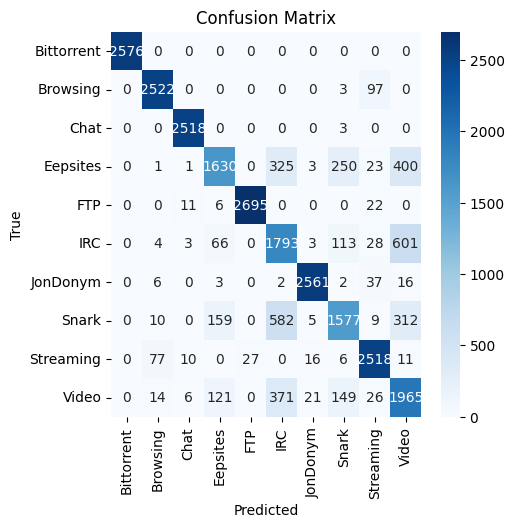

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have your kf and other setup ready...

# After the loop for cross-validation, you can create confusion matrices for each fold
for fold_index, (train_index, test_index) in enumerate(kf.split(X_scaled)):
    # ... (existing code) ...

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test_class, y_pred)

    # Check if the current fold is the 5th fold (index 4)
    if fold_index == 4:
        # Plot the confusion matrix
        plt.figure(figsize=(5,5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names)
        plt.title(f'Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
